In [72]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
term_freq_df = pd.read_csv('term_freq_data.csv')

In [74]:
term_freq_df.head()

,word,negative,positive,total
0,aa,168,97,265
1,aaa,97,55,152
2,aaaa,45,29,74
3,aaaaa,26,12,38
4,aaaaaa,16,12,28


In [75]:
df = term_freq_df.sort_values(by='total', ascending=False)
df = df.reset_index(drop=True)

In [76]:
df.head()

,word,negative,positive,total
0,to,313185,252600,565785
1,the,257953,266161,524114
2,my,190805,125981,316786
3,it,157491,147841,305332
4,and,153985,149692,303677


# Zipf's Law

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.

Suppose a word occurs f times and that in the list of word frequencies it has a certain rank, r. Then if Zipf's Law holds we have

$f = a/r^{b}$

where a and b are constants and $b ≈ 1$.

Let's see how the tweet tokens and their frequencies look on a plot

Text(0.5, 1.0, 'Top 500 tokens in tweets')

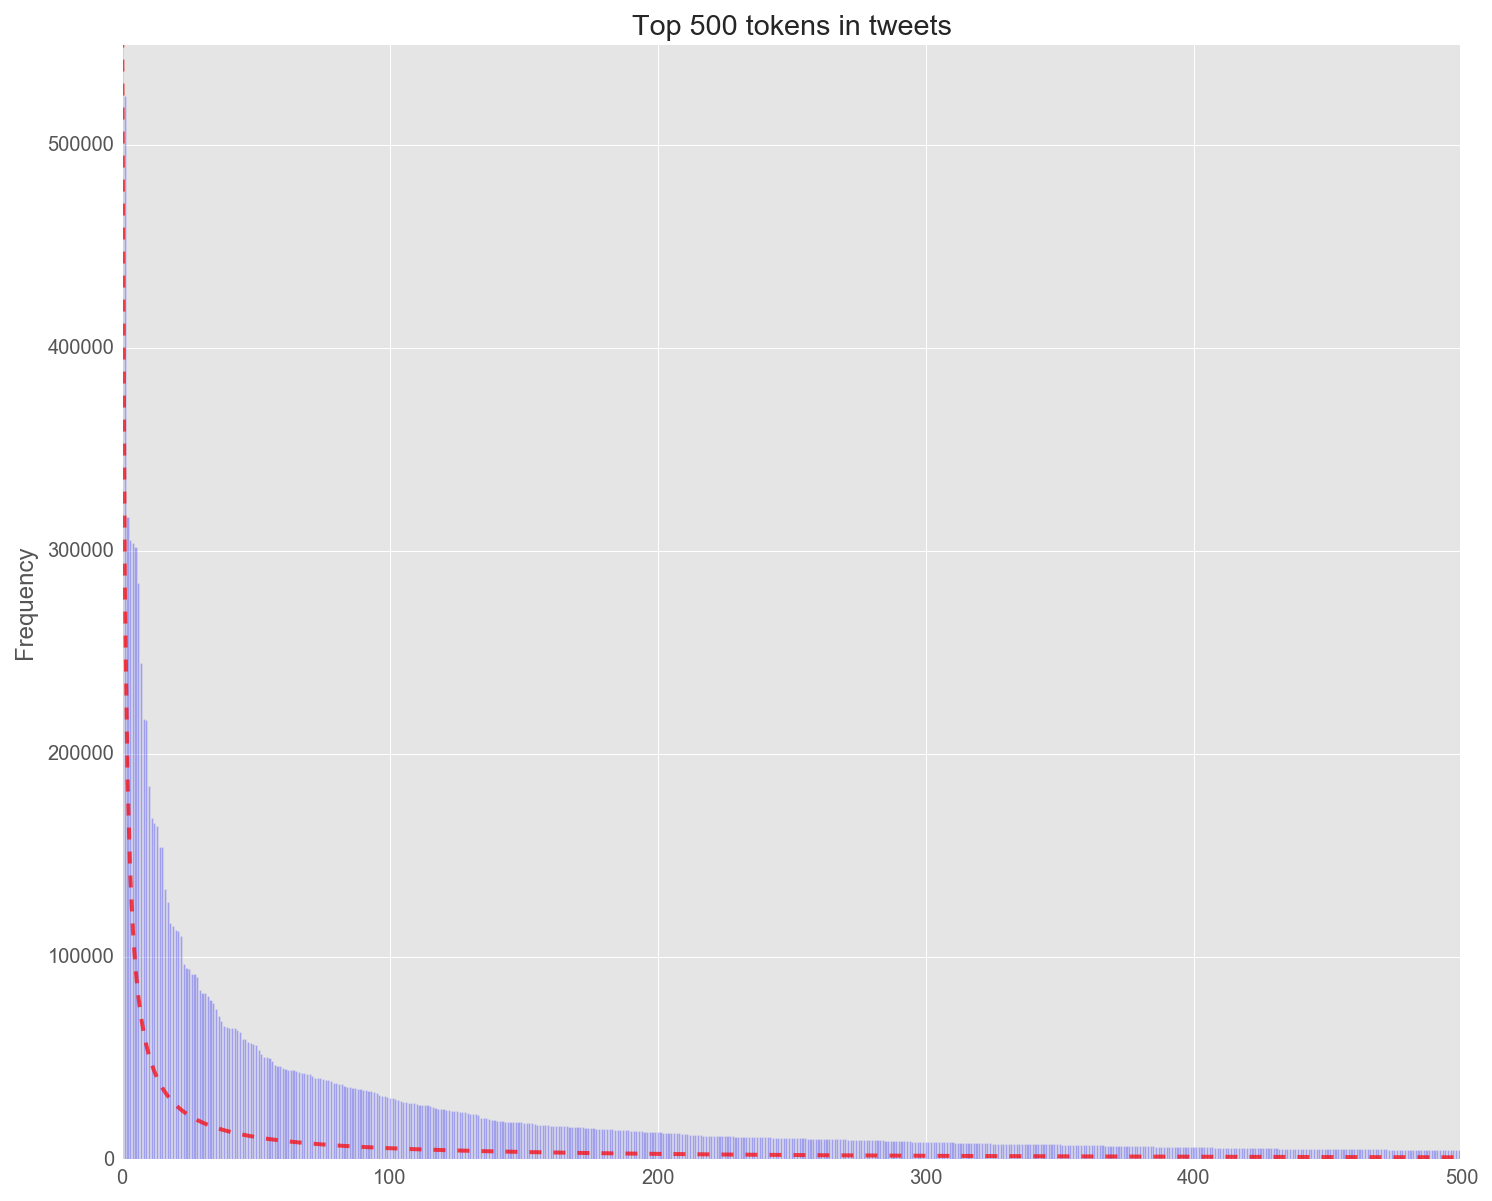

In [82]:
plt.style.use('ggplot')
y_pos = np.arange(500)
plt.figure(figsize=(12,10))
expected_zipf = [df['total'][0]/(i+1) for i in y_pos]
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.7)
plt.bar(y_pos, df['total'][:500],alpha=0.3, color='blue')
plt.xlim(0,500)
plt.ylim(0, 550000)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')